In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler


In [2]:
df = pd.read_csv("Daegu_Real_Estate_data.csv")
df

,SalePrice,YearBuilt,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,814,3,terraced,individual_heating,management_in_trust,111,184,5min~10min,...,1,1,0,3,2,2,2,5,6,9
1,51327,1985,587,8,corridor,individual_heating,self_management,80,76,0~5min,...,1,2,1,2,1,1,0,3,12,4
2,48672,1985,587,6,corridor,individual_heating,self_management,80,76,0~5min,...,1,2,1,2,1,1,0,3,12,4
3,380530,2006,2056,8,terraced,individual_heating,management_in_trust,249,536,0~5min,...,1,0,0,2,2,1,2,5,3,7
4,221238,1993,1761,3,mixed,individual_heating,management_in_trust,523,536,0~5min,...,1,5,0,4,3,5,5,4,14,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,511504,2007,1643,19,terraced,individual_heating,management_in_trust,0,1270,0~5min,...,1,0,2,3,3,2,2,10,9,10
5887,298230,2006,903,13,terraced,individual_heating,management_in_trust,123,181,5min~10min,...,1,2,0,4,3,3,1,4,8,11
5888,357522,2007,868,20,terraced,individual_heating,management_in_trust,0,1270,0~5min,...,1,0,2,3,3,2,2,10,9,10
5889,312389,1978,1327,1,corridor,individual_heating,self_management,87,0,0~5min,...,1,0,0,3,3,3,2,3,7,11


In [3]:
hallway_dummies = pd.get_dummies(df['HallwayType'])
heating_dummies = pd.get_dummies(df['HeatingType'])
aptmanage_dummies = pd.get_dummies(df['AptManageType'])
timetobus_dummies = pd.get_dummies(df['TimeToBusStop'])
timetosubway_dummies = pd.get_dummies(df['TimeToSubway'])


hallway_dummies.shape,heating_dummies.shape,aptmanage_dummies.shape,timetobus_dummies.shape,timetosubway_dummies.shape

((5891, 3), (5891, 2), (5891, 2), (5891, 3), (5891, 5))

Remove String Categorical Variable

In [4]:
df = df.drop(['HallwayType','HeatingType','AptManageType','TimeToBusStop','TimeToSubway'],axis=1)
df

,SalePrice,YearBuilt,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_APT,N_manager,N_elevators,N_FacilitiesNearBy(PublicOffice),...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,814,3,111,184,3,3,0,2,...,1,1,0,3,2,2,2,5,6,9
1,51327,1985,587,8,80,76,1,2,2,5,...,1,2,1,2,1,1,0,3,12,4
2,48672,1985,587,6,80,76,1,2,2,5,...,1,2,1,2,1,1,0,3,12,4
3,380530,2006,2056,8,249,536,6,5,11,1,...,1,0,0,2,2,1,2,5,3,7
4,221238,1993,1761,3,523,536,8,8,20,6,...,1,5,0,4,3,5,5,4,14,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,511504,2007,1643,19,0,1270,7,14,16,3,...,1,0,2,3,3,2,2,10,9,10
5887,298230,2006,903,13,123,181,3,3,11,3,...,1,2,0,4,3,3,1,4,8,11
5888,357522,2007,868,20,0,1270,7,14,16,3,...,1,0,2,3,3,2,2,10,9,10
5889,312389,1978,1327,1,87,0,2,1,4,3,...,1,0,0,3,3,3,2,3,7,11


Insert encoded categorical variables

In [5]:
X = pd.concat([df,hallway_dummies,heating_dummies,aptmanage_dummies,timetobus_dummies,timetosubway_dummies],axis=1)
X

,SalePrice,YearBuilt,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_APT,N_manager,N_elevators,N_FacilitiesNearBy(PublicOffice),...,management_in_trust,self_management,0~5min,10min~15min,5min~10min,0-5min,10min~15min,15min~20min,5min~10min,no_bus_stop_nearby
0,141592,2006,814,3,111,184,3,3,0,2,...,1,0,0,0,1,0,1,0,0,0
1,51327,1985,587,8,80,76,1,2,2,5,...,0,1,1,0,0,0,0,0,1,0
2,48672,1985,587,6,80,76,1,2,2,5,...,0,1,1,0,0,0,0,0,1,0
3,380530,2006,2056,8,249,536,6,5,11,1,...,1,0,1,0,0,1,0,0,0,0
4,221238,1993,1761,3,523,536,8,8,20,6,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,511504,2007,1643,19,0,1270,7,14,16,3,...,1,0,1,0,0,1,0,0,0,0
5887,298230,2006,903,13,123,181,3,3,11,3,...,1,0,0,0,1,1,0,0,0,0
5888,357522,2007,868,20,0,1270,7,14,16,3,...,1,0,1,0,0,1,0,0,0,0
5889,312389,1978,1327,1,87,0,2,1,4,3,...,0,1,1,0,0,1,0,0,0,0


MinMax Scaler

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

X_scaled.mean(axis = 1)

array([0.32593467, 0.31136731, 0.30995057, ..., 0.48214965, 0.33475081,
       0.47941811])

In [7]:
X_scaled.shape

(5891, 37)

# Clustering

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_range = np.arange(2,31)

metrics_range = []

for k in k_range:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X_scaled)
    inertia = kmeans.inertia_
    silhoutte = silhouette_score(X_scaled,kmeans.labels_)
    
    metrics_range.append((k,inertia,silhoutte))


In [9]:
score = pd.DataFrame(metrics_range,columns=['k','inertia','silhoutte'])
score.sort_values(by='silhoutte',ascending=False)

,k,inertia,silhoutte
22,24,325.835499,0.811736
21,23,376.631092,0.805632
20,22,434.412576,0.800568
19,21,532.261804,0.789323
23,25,292.105082,0.787630
18,20,634.983732,0.777873
17,19,763.721706,0.769223
16,18,966.453189,0.759714
25,27,246.090200,0.757708
24,26,262.190949,0.754940


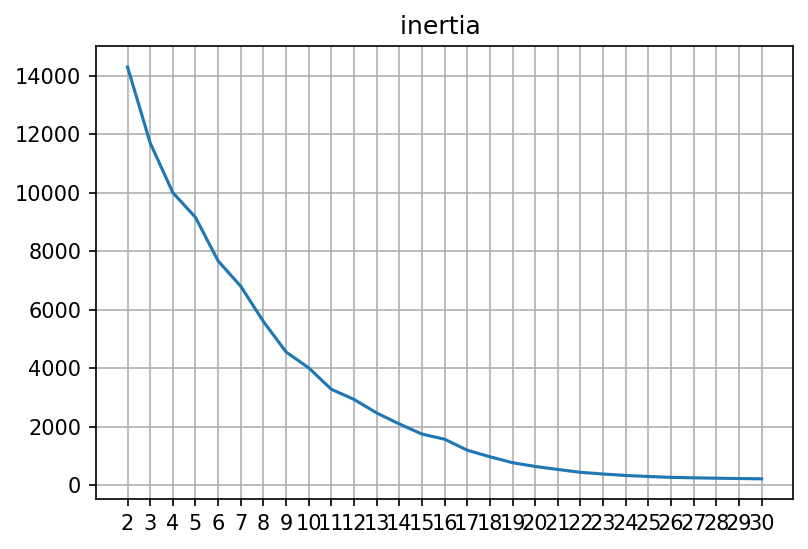

In [10]:
plt.figure(dpi = 150)
plt.plot(score.iloc[:,1])
plt.xticks(np.arange(0,29),labels=np.arange(2,31))
plt.grid(True)
plt.title('inertia ')
plt.show()

 silhouette since it uses inter- and intra-cluster distances in its scoring function while the elbow method only uses intra-cluster distances.
 
 when k = 24 silhoutte is highest besides inertia is not that high which are positive statements. So I choose 24

In [11]:
kmeans = KMeans(n_clusters = 24)
kmeans.fit(X_scaled)
inertia = kmeans.inertia_
silhoutte = silhouette_score(X_scaled,kmeans.labels_)

inertia,silhoutte


(325.83549851603084, 0.8117357100344315)

# Highest sales values

In [12]:
kmeans.labels_

array([15,  5,  5, ..., 10, 19, 10])

In [13]:
unique_classes = np.unique(kmeans.labels_)
unique_classes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [14]:
averages = []
counter = 0

for l  in unique_classes:
    mask =  (kmeans.labels_ == l)
    mean = X.iloc[mask,0].mean()
    
    averages.append((l,mean))
    
    counter += X.iloc[mask,:].shape[0]
    

assert counter == X.shape[0]
    

In [15]:
pd.DataFrame(averages,columns=['class','mean']).sort_values(by='mean',ascending=False)

,class,mean
1,1,383925.597360
20,20,374760.187500
12,12,357111.027027
10,10,336291.418033
11,11,312737.177340
6,6,304910.950000
13,13,288803.762376
16,16,269142.320513
18,18,243339.081481
3,3,220782.763975


# class 1 with highest values and class 22 with lowest values

# Also See Same results with plot

In [16]:
classes = pd.DataFrame(kmeans.labels_,columns=['class'])

In [17]:
pricedf = pd.concat([df,classes],axis=1)[['SalePrice','class']]
pricedf

,SalePrice,class
0,141592,15
1,51327,5
2,48672,5
3,380530,13
4,221238,7
...,...,...
5886,511504,10
5887,298230,3
5888,357522,10
5889,312389,19


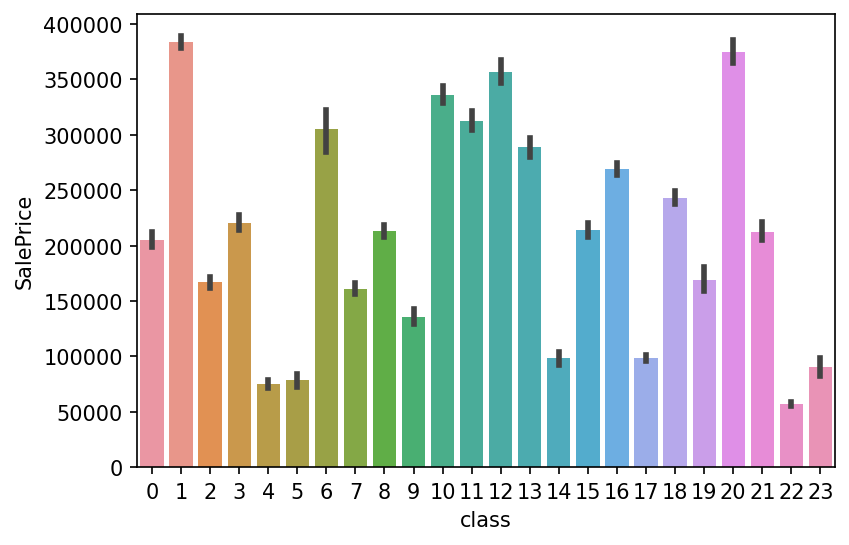

In [18]:
import seaborn as sns

plt.figure(dpi = 150)
sns.barplot(x = 'class',y='SalePrice',data=pricedf)
plt.show()

# Also from here 1 is highest sale values, 17 is lowest

# Cluster Centers

In [19]:
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[ 3.11765826e-01,  2.16216216e-01,  4.88595216e-01,
         1.24047619e-01,  1.00000000e+00,  2.77555756e-16,
         5.00000000e-01,  5.38461538e-01,  1.00000000e+00,
         7.14285714e-01,  5.00000000e-01,  5.00000000e-01,
        -2.77555756e-16,  2.00000000e-01,  5.00000000e-01,
         5.00000000e-01,  2.50000000e-01,  2.00000000e-01,
         2.00000000e-01,  3.33333333e-01,  5.62500000e-01,
         3.52941176e-01,  8.32667268e-17, -2.77555756e-16,
         1.00000000e+00,  1.00000000e+00,  2.22044605e-16,
         1.00000000e+00,  3.46944695e-17,  1.00000000e+00,
         1.73472348e-18, -2.77555756e-17,  5.55111512e-17,
         1.00000000e+00, -8.32667268e-17, -5.55111512e-17,
        -2.08166817e-17],
       [ 6.34938532e-01,  7.83783784e-01,  6.23988693e-01,
         3.08816596e-01,  9.81767181e-03,  4.57986374e-01,
         8.33333333e-02,  3.07692308e-01,  1.85185185e-01,
         5.71428571e-01,  5.00000000e-01,  1.00000000e+00,
         5.00000000e-01,  1.11

In [48]:
cluster_centers[0].shape,len(X.columns)

((37,), 37)

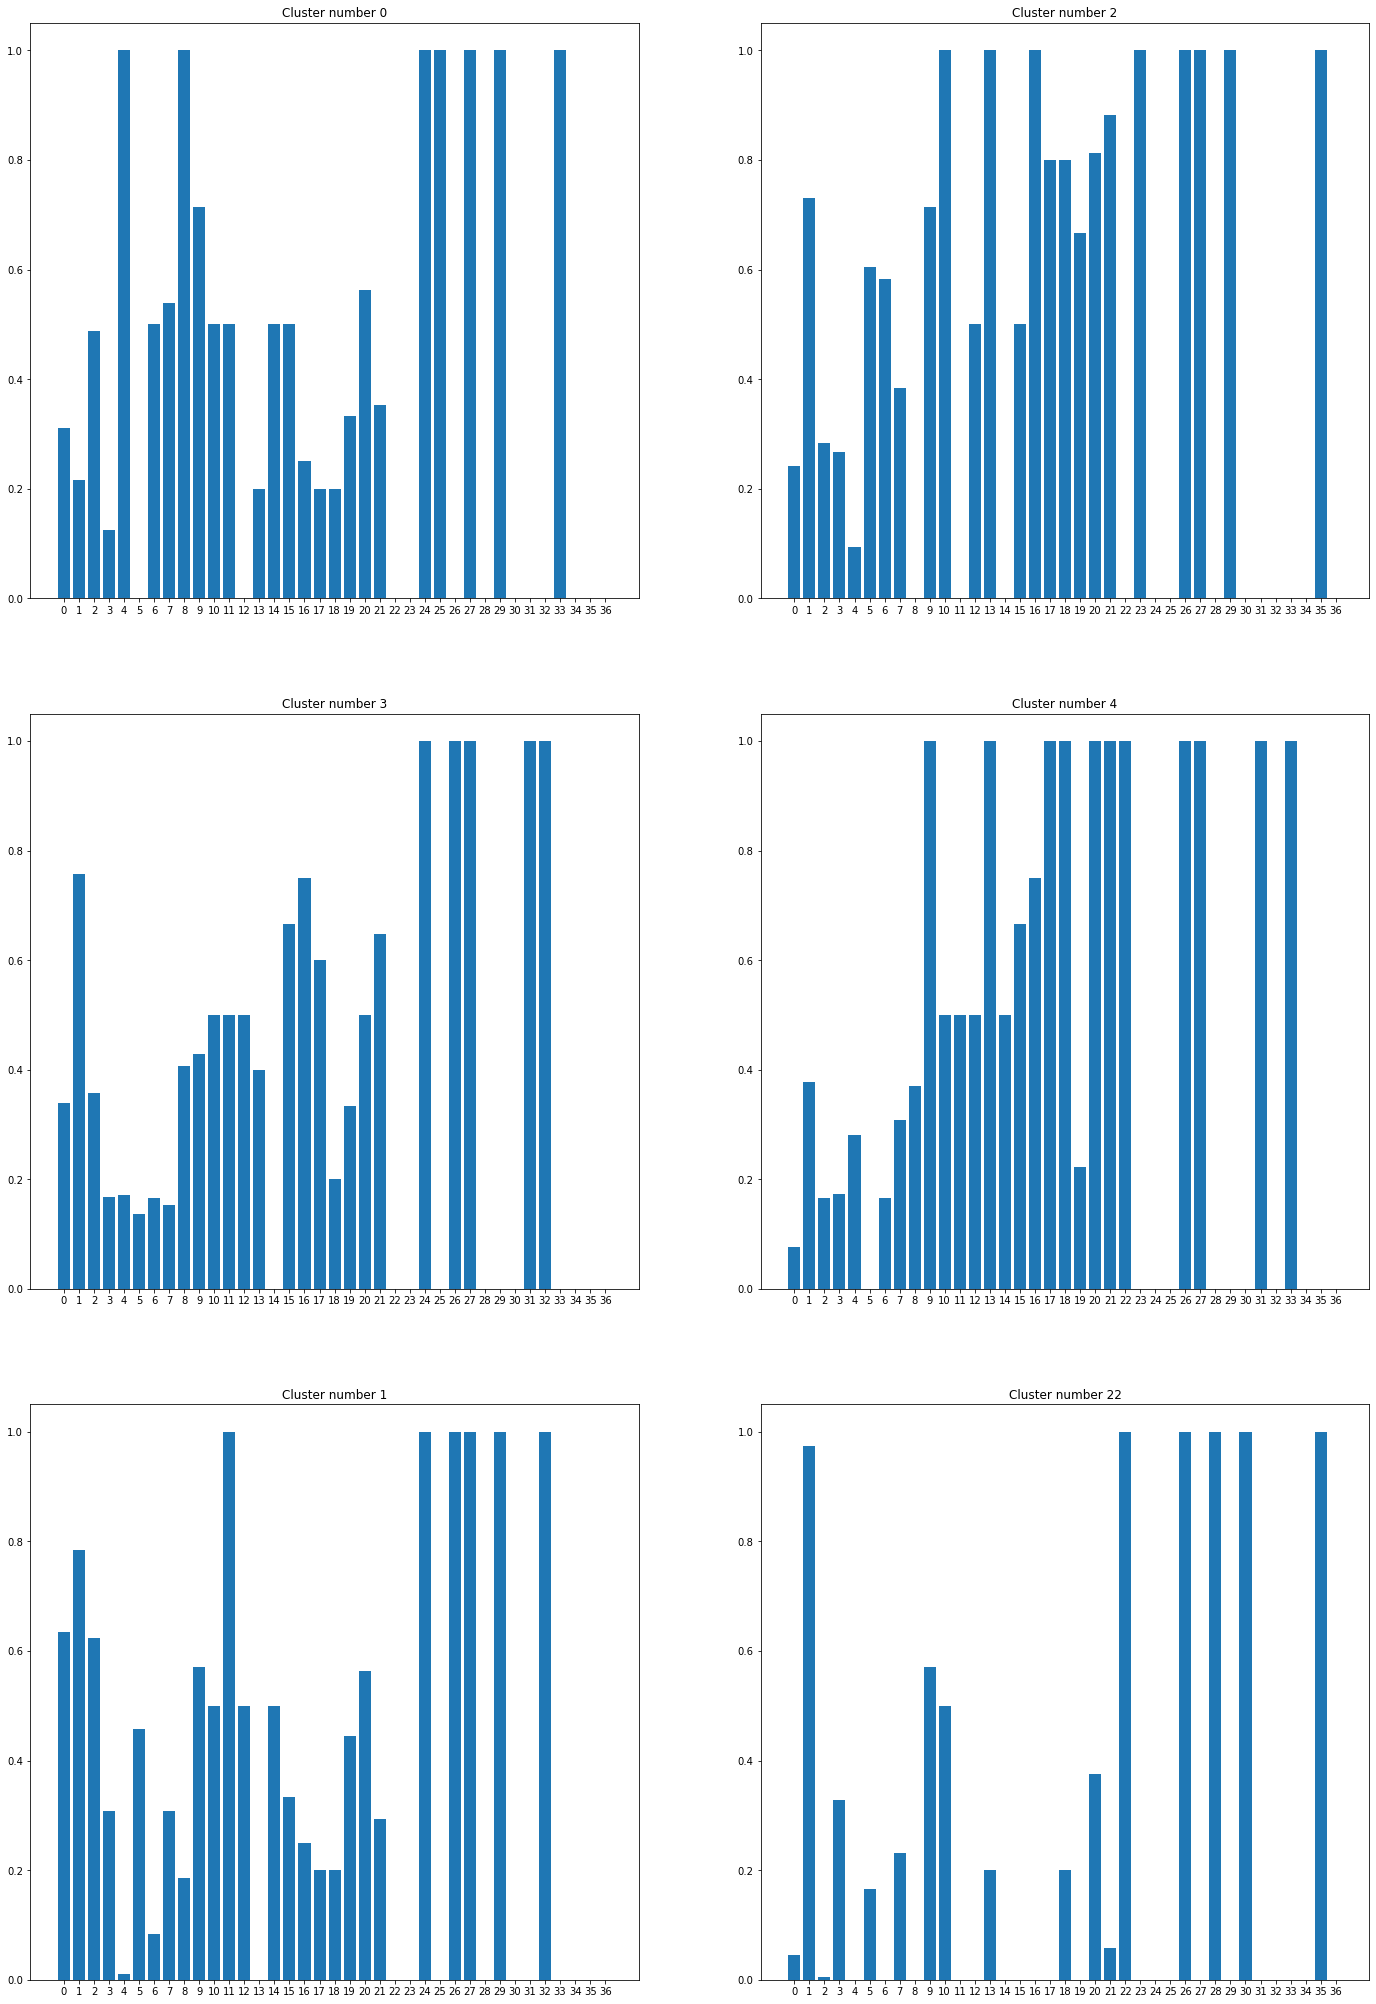

In [51]:
rows,cols = 3,2

fig,ax = plt.subplots(nrows=rows,ncols=cols, figsize = (cols*12,rows*12))

clusters_to_plot = [0,2,3,4,1,22]
counter=0

for i in range(3):
    for j in range(2):
        ax[i,j].bar(np.arange(0,X.shape[1],1),height=cluster_centers[clusters_to_plot[counter]])
        ax[i,j].set_title(f'Cluster number {clusters_to_plot[counter]}')
        ax[i,j].set_xticks(np.arange(0,X.shape[1],1))
        counter+=1
        


plt.show()


# Interpretation

Here we see center of clusters. Particularly you see 22th and 1th clusters at last 2 plots. We saw that 1th cluster has highest sale value column 0. And in center of cluster for label1 we see that it is over 0.6. But in cluster 17th which has lowest sale value in sale value column 0. In the plot bar its center points of that column 0 is close to zero. 4th cluster was the one with lowest sale value after cluster 17. So its cluster center for column 0 is close to zero which justifies the expression. 

As min max scaler project values into to 0-1 scale. Center of cluster close to 1 can represent highest values of that feature.
Generally we also see some values that are almost exactly close to the 0 or 1. This can occurs for categorical examples where cluster only want to include that type of feature. But in continous variables it is a bit hard to see that situation.